# Financial Inclusion in Africa
You are asked to make predictions for each unique id in the financial inclusion dataset(https://zindi.africa/competitions/financial-inclusion-in-africa/data) about the likelihood of the person having a bank account. Your goal is to accurately predict the likelihood that an individual has a bank account or not, i.e. Yes = 1, No = 0.

In [1]:
# Author: Kaluba Chikonde
# Date: 4 october 2019
# Predicting the likelihood of an individual having a bank account

## Import packages required

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import bokeh as bk

## Import the data

In [3]:
train_set = pd.read_csv("Train_v2.csv")
test_set = pd.read_csv("Test_v2.csv")

## View first 5 observations in train data

In [4]:
train_set.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## View last 5 observations in train data

In [5]:
train_set.tail()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


## randomly sample 5 observations

In [6]:
train_set.sample(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
15871,Tanzania,2017,uniqueid_1069,No,Urban,Yes,1,18,Male,Head of Household,Divorced/Seperated,Secondary education,Remittance Dependent
18346,Tanzania,2017,uniqueid_3544,No,Urban,No,2,42,Female,Spouse,Single/Never Married,Primary education,Informally employed
18785,Tanzania,2017,uniqueid_3983,No,Rural,Yes,9,22,Female,Parent,Married/Living together,Secondary education,Formally employed Private
21773,Uganda,2018,uniqueid_351,No,Rural,No,6,28,Male,Head of Household,Married/Living together,Primary education,Other Income
15459,Tanzania,2017,uniqueid_657,No,Urban,Yes,4,28,Female,Spouse,Single/Never Married,Primary education,Self employed


## Summary statistics 

In [7]:
print(train_set.describe())

               year  household_size  age_of_respondent
count  23524.000000    23524.000000       23524.000000
mean    2016.975939        3.797483          38.805220
std        0.847371        2.227613          16.520569
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          49.000000
max     2018.000000       21.000000         100.000000


In [8]:
print(train_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


# Exploratory Data Analysis

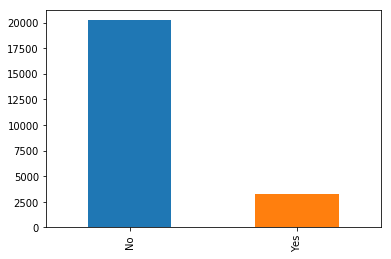

In [9]:
train_set.bank_account.value_counts().plot(kind='bar')

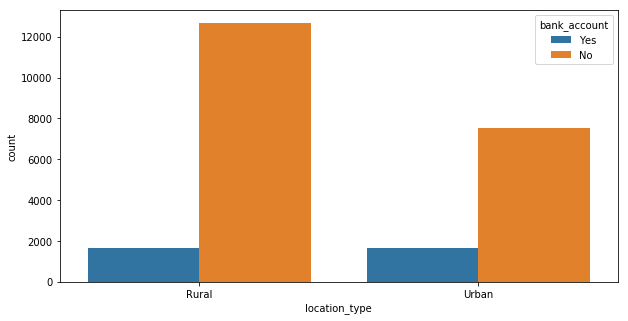

In [10]:
fig = plt.figure(figsize = (10,5))
sns.countplot('location_type', hue= 'bank_account', data=train_set)

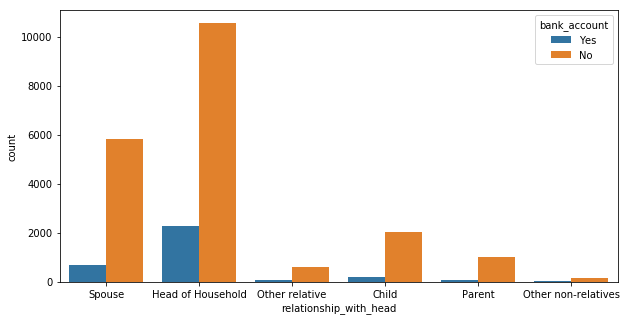

In [11]:
fig = plt.figure(figsize = (10,5))
sns.countplot('relationship_with_head', hue= 'bank_account', data=train_set)

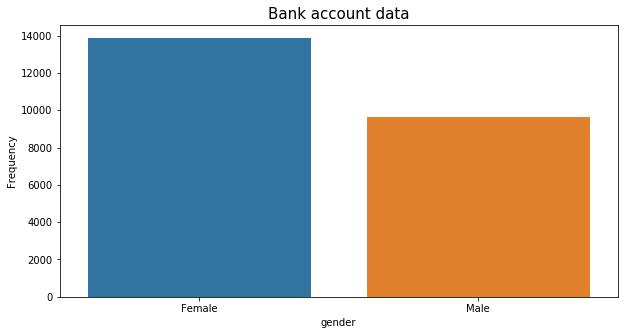

In [12]:
fig = plt.figure(figsize = (10,5)) # Just so we can set figure size
plot = sns.countplot(train_set.gender_of_respondent)
plot.set_title("Bank account data", fontsize = 15)
plot.set(xlabel='gender', ylabel='Frequency')
plt.show()

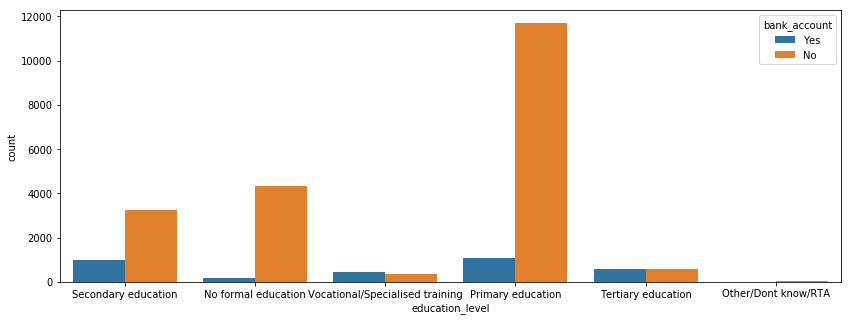

In [13]:
fig = plt.figure(figsize = (14,5))
sns.countplot('education_level', hue= 'bank_account', data=train_set)

Text(0.5, 1.0, 'Education level distribution')

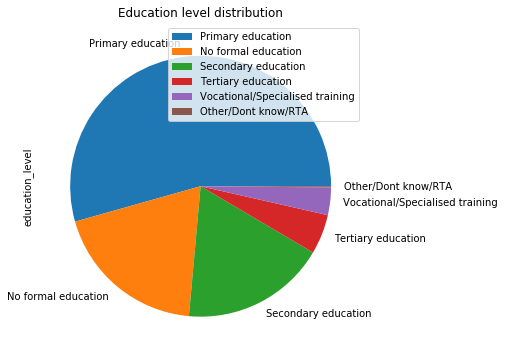

In [14]:
plot = train_set.education_level.value_counts().plot(kind = "pie", figsize = (6,6),legend=True)
plot.set_title("Education level distribution")

Text(0.5, 1.0, 'Education level distribution')

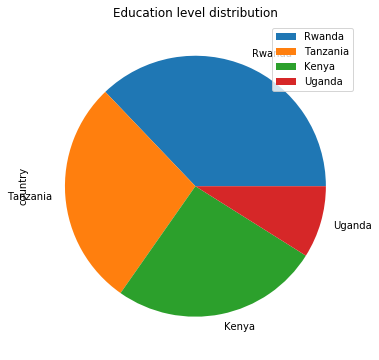

In [15]:
plot = train_set.country.value_counts().plot(kind = "pie", figsize = (6,6),legend=True)
plot.set_title("Education level distribution")

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'household size')]

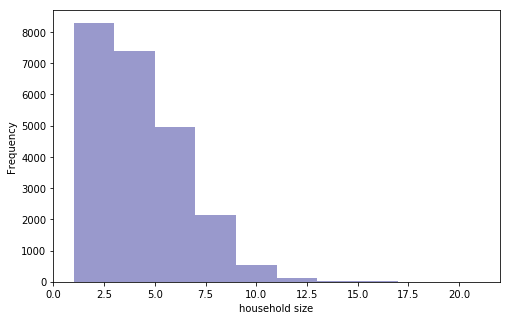

In [16]:
plt.figure(figsize = (8,5))
hist = sns.distplot(train_set.household_size, kde = False, bins = 10,color="navy")
hist.set(xlabel='household size', ylabel='Frequency')

Text(0, 0.5, 'Frequency')

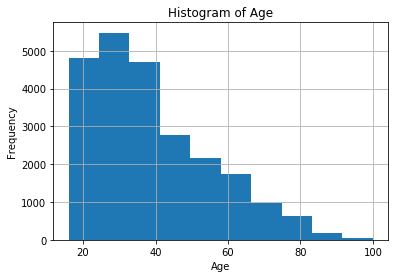

In [17]:
train_set.age_of_respondent.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Data Preparation

## Check for null values 
Zero values for all columns means we don't have any null value in any of the columns

In [18]:
train_set.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

## Convert response variable to 0's and 1's 
## "Yes'' = 1 and "No" = 0

In [19]:
train_set.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [20]:
train_set['bank_account'] = train_set['bank_account'].map({'No': 0, 'Yes': 1})

In [21]:
train_set.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## Define response variable "y"

In [22]:
y = train_set['bank_account']

## Define explanatory variable "x"

In [23]:
x = train_set.drop(["uniqueid","bank_account","country","job_type",'marital_status','relationship_with_head'], axis = 1)

In [24]:
x.head()

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level
0,2018,Rural,Yes,3,24,Female,Secondary education
1,2018,Rural,No,5,70,Female,No formal education
2,2018,Urban,Yes,5,26,Male,Vocational/Specialised training
3,2018,Rural,Yes,5,34,Female,Primary education
4,2018,Urban,No,8,26,Male,Primary education


## Create dummy variables 

###  Location type: "Urban" = 1, "Rural" = 0

In [25]:
x["location_type"] = x["location_type"].map({'Rural': 0, 'Urban': 1})


###  Cellphone access: "Yes" = 1, "No" = 0

In [26]:
x["cellphone_access"] = x["cellphone_access"].map({'No': 0, 'Yes': 1})



###  Gender: "Male" = 1, "Female" = 0

In [27]:
x["gender_of_respondent"] = x["gender_of_respondent"].map({'Female': 0, 'Male': 1})

### Let us group all formal education together and No formal education in another group

In [28]:
x['education_level']=np.where(x['education_level'] =='Secondary education', 'Formal education', x['education_level'])
x['education_level']=np.where(x['education_level'] =='Primary education', 'Formal education', x['education_level'])
x['education_level']=np.where(x['education_level'] =='Vocational/Specialised training', 'Formal education', x['education_level'])
x['education_level']=np.where(x['education_level'] =='Tertiary education', 'Formal education', x['education_level'])
x['education_level']=np.where(x['education_level'] =='Other/Dont know/RTA', 'No formal education', x['education_level'])

### "Formal education" = 1, "No formal education" = 0

In [29]:
x['education_level'] = x['education_level'].map({'No formal education': 0, 'Formal education': 1})

In [30]:

x.head()


,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level
0,2018,0,1,3,24,0,1
1,2018,0,0,5,70,0,0
2,2018,1,1,5,26,1,1
3,2018,0,1,5,34,0,1
4,2018,1,0,8,26,1,1


## Split data into train and test .. Why?
Next, we split 70% of the data into training set while 30% of the data to test set using below code.


In [31]:
from sklearn.model_selection import train_test_split 

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [33]:
len(x_train)
len(x_test)

7058

## Finally, we can fit our logistic regression model to train set

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

In [35]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.354340
         Iterations 8
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.121     
Dependent Variable:   bank_account      AIC:               11683.1249
Date:                 2019-10-05 11:43  BIC:               11737.0883
No. Observations:     16466             Log-Likelihood:    -5834.6   
Df Model:             6                 LL-Null:           -6638.6   
Df Residuals:         16459             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       8.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
year                 -0.0031   0.0001 -34.5409 0.0000 -0.0032 -0.0029
location_type   

### We can see that all p-values very small. Therefore, all variables are significant

## Fit model on test data

In [37]:
y_pred=logreg.predict(x_test)


## Check accuracy of model

In [38]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[6035,    0],
       [1023,    0]])

In [39]:
Accuracy = (6035+0)/(6035+1023)
Accuracy

0.8550580901105129

## Alternatively, 

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8550580901105129


In [41]:
Misclassification = (1023+0)/(6035+1023)
Misclassification 

0.1449419098894871

## Visualize confusion matrix

Text(0.5, 257.44, 'Predicted label')

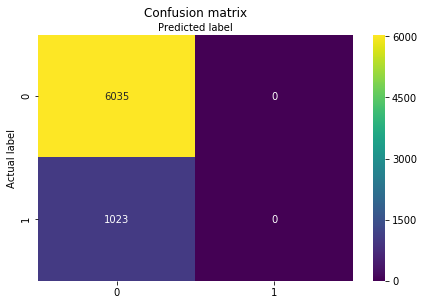

In [42]:
fig, ax = plt.subplots()
class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Hope you noticed that our model is pretty biased! Prediction accuracy os It predicted everything to be 0. Our train set is probably a biased sample.
## FIN!!!